In [1]:
!pip install contractions

     |████████████████████████████████| 283 kB 21.4 MB/s eta 0:00:01
     |████████████████████████████████| 321 kB 51.4 MB/s eta 0:00:01
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=35384 sha256=a6a968a29099f3bb3953df812c83fd9f9ca02582ec76af1577517aac26574497
  Stored in directory: /home/jovyan/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [3]:
import pandas as pd
df=pd.read_csv("amazonreviews.tsv",sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


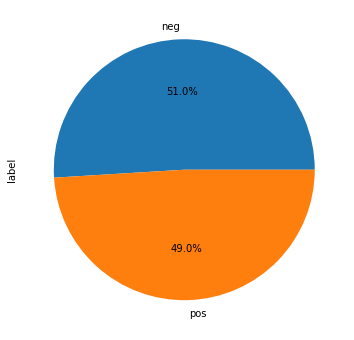

In [4]:
df["label"].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))

In [5]:
pip install nltk

     |████████████████████████████████| 1.5 MB 15.4 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 4.2 MB/s  eta 0:00:01
     |████████████████████████████████| 721 kB 34.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
#importing all the required libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import tokenize

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guida

In [5]:
df.review=df.review.apply(lambda x: x.lower())
df.review[1]

"the best soundtrack ever to anything.: i'm reading a lot of reviews saying that this is the best 'game soundtrack' and i figured that i'd write a review to disagree a bit. this in my opinino is yasunori mitsuda's ultimate masterpiece. the music is timeless and i'm been listening to it for years now and its beauty simply refuses to fade.the price tag on this is pretty staggering i must say, but if you are going to buy any cd for this much money, this is the only one that i feel would be worth every penny."

In [7]:
import contractions

# Expanding contractions
def con(text):
  expand=contractions.fix(text)
  return expand

df.review=df.review.apply(con)
df['review'][1]

"the best soundtrack ever to anything.: I am reading a lot of reviews saying that this is the best 'game soundtrack' and i figured that I would write a review to disagree a bit. this in my opinino is yasunori mitsuda's ultimate masterpiece. the music is timeless and I am been listening to it for years now and its beauty simply refuses to fade.the price tag on this is pretty staggering i must say, but if you are going to buy any cd for this much money, this is the only one that i feel would be worth every penny."

In [8]:
import string

def remove_punc(text):
    for i in string.punctuation:
        text=text.replace(i,' ')
    
    return text

df.review=df.review.apply(remove_punc)

In [9]:
df.review[4]

'remember  pull your jaw off the floor after hearing it  if you have played the game  you know how divine the music is  every single song tells a story of the game  it is that good  the greatest songs are without a doubt  chrono cross  time s scar  magical dreamers  the wind  the stars  and the sea and radical dreamers  unstolen jewel   translation varies  this music is perfect if you ask me  the best it can be  yasunori mitsuda just poured his heart on and wrote it down on paper '

In [10]:
nltk.download('stopwords')
stopword_list=stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
print(stopword_list)

df.review=df.review.apply(lambda x : " ".join(x for x in x.split() if x not in stopword_list))
df['review'][5]

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very',

'absolute masterpiece quite sure actually taking time read played game least heard least tracks whether aware not mitsuda music contributed greatly mood every single minute whole game composed 3 cds quite songs not exact count heart rendering impressively remarkable soundtrack one assure not forget everything every listener fast paced energetic dancing tokage termina home slower haunting dragon god purely beautifully composed time scar even fantastic vocals radical dreamers one best videogame soundtracks surely mitsuda best ever'

In [11]:
nltk.download('punkt')
df['review']=df.review.apply(word_tokenize)
df['review'][0]

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['stuning',
 'even',
 'non',
 'gamer',
 'sound',
 'track',
 'beautiful',
 'paints',
 'senery',
 'mind',
 'well',
 'would',
 'recomend',
 'even',
 'people',
 'hate',
 'vid',
 'game',
 'music',
 'played',
 'game',
 'chrono',
 'cross',
 'games',
 'ever',
 'played',
 'best',
 'music',
 'backs',
 'away',
 'crude',
 'keyboarding',
 'takes',
 'fresher',
 'step',
 'grate',
 'guitars',
 'soulful',
 'orchestras',
 'would',
 'impress',
 'anyone',
 'cares',
 'listen']

In [13]:
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()
df['review']=df.review.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
df.review= df.review.astype(str)


In [15]:
x = df.iloc[:,1].values 
y = df.iloc[:,0].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [17]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train_tfidf,y_train)

y_pred=clf.predict(x_test_tfidf)
print(y_pred, y_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


['neg' 'neg' 'neg' ... 'neg' 'neg' 'neg'] ['neg' 'pos' 'neg' ... 'pos' 'neg' 'pos']


In [18]:
y_pred=clf.predict(x_test_tfidf)
print(y_pred, y_test)

['neg' 'neg' 'neg' ... 'neg' 'neg' 'neg'] ['neg' 'pos' 'neg' ... 'pos' 'neg' 'pos']


In [19]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print()
print(accuracy_score(y_pred,y_test))


0.4996


In [23]:
message=["the product is great"]
message=tfidf.transform(message).toarray()
clf.predict(message)[0]

'neg'